# COGS 108 - Final Project 

# Overview

Nowadays, due to the huge variety of moblie applications, the competition inside the market is extremely high. Every application that wants to be successful has to utilize all available data in order to improve its quality and to avoid possible decisions that could detriment its success. Thus, correct analysis of different phenomena related to applications and discovery of any hidden patterns inside relevant data are essential in helping applications achieve these goals.

Our team came up with the idea that an application's name could be an influential indicator of its success, and we hope to explore upon this idea in our project.

## Names

- Aliaksandr Samushchyk
- Jiayi Zhang
- Soumya Agrawal
- Richard Duong
- Titan Ngo
- Yaman El-Jandali

## Group Members IDs

- A15672156
- A14533542
- A14402679
- A15196673
- A15525832
- A15753076

# Research Question

__1) Is the length of an app’s name significant in explaining its success?__

__2) Are there any letters/combinations of letters that tend to be present in successful applications?__

__TODO EDA__:
- TODO - We drop everything outside 2 standard deviations (after histograms)
- outliers - historgram before taking out outliers, talk about outliers, take out outliers, show graph w/out outliers
- Fix scatter plots
- Answer EDA qs:
    What distributions do your variables take?
    Are there any outliers? Relationships between variables?

main TODO - BEAUTIFY and write things along eda

# Background and Prior Work

The dataset that we found presents a lot of interesting insights about user
preferences, and we want to explore the effects of certain user preferences on app
rating and popularity.
There is not a lot of background knowledge that we know about user preferences
affecting app popularity other than the obvious correlations between app
rating/popularity, so we would like to use the data to try and find more subtle biases
that might affect it such as title/title length, etc.

References:
- 1)
“A Statistical Analysis of the Apple App Store” by Colin Eberhardt
Did a statistical analysis of prices of apps in the Apple App store. Did not do much
other than basic statistical analysis, such as looking at the genre distribution of apps
and the price differences across genres. Found a positive correlation between price
and app rating.
Source: https://blog.scottlogic.com/2014/03/20/app-store-analysis.html
- 2)
Did a statistical analysis of various factors that contribute to the success of an app in
the Google Play Store. Found that most free apps are monetized by advertisements.
Learned that ~80% of apps on the playstore have been downloaded less than 50k
times. Found that a small amount of users who install actually take the time to write
a review.
Source:
https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-the-google-play-store/

The scope of our project is a bit beyond the analysis that these projects present, but
in a similar vein. While these projects analyzed the more basic factors that weigh in
the success of an app, we will be focusing more on subtle user preferences that are
not as obvious to correlate to success.

# Hypothesis

We will measure the success of an application using a few metrics such as the number of installations, the rating of an application, and the number of reviews for the app combined with sentiment analysis of the content of these reviews. We expect that thetitle has an influence on the
applications’ success. In particular, we expect the length of
titles to be a significant explanatory variable; from our point of view, the more time you spend to read the names of anything the less interest you keep. 

__TODO: add hypothesis about letters__

# Dataset

- Dataset Name: Google Play Store Apps
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps?fbclid=IwAR0I6EIgxdnc3LWhwVVg85gZ9RokprTW6xDo47EQxwDu5Qkce24ZC2MbIBs#googleplaystore_user_reviews.csv
- Number of observations: 64.3k

__TODO - take out sentiment, also talk about combos of letters__

This dataset provides up with a zipped folder containing two files. The first file has around 64.3k observations, with 5 variables. These include the app name, translated review, sentiment, sentiment polarity, and sentiment subject. Most of these variables have been preprocessed already, such as the translated review and sentiment. Many observations in this file (or the reviews), are for the same app. As for the second file, there are around 10.8k observations with 13 variables. The variables include app name, category of the app, the overall user rating, number of reviews, size of the app, number of installs, whether the app is paid or free, the price of the app, the content rating, the genres, when the data was last updated, the current version of the app available on the app store, and the minimum required Android version for the app. With these different features of the app, we will be able to ask our main question, which centers around the popularity of an app, and what makes it popular. Using the sentiment analysis on the reviews and analysis on the title (popular keywords in titles, length of the titles), we can determine factors other than the rating or number of installs to determine an app's popularity.

# Setup

In [2]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns\

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [3]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv.

For an analysis of app names, we can focus on just the first data set. The second data set gives us reviews of each app, which is not needed for this project.

In [4]:
df = pd.read_csv("google_play_dataset/googleplaystore.csv")

In [5]:
# Preview dataset and get a grasp on its size
df

,App,Category,Rating,Reviews,...,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,...,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,...,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,...,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
...,...,...,...,...,...,...,...,...,...
10838,Parkinson Exercices FR,MEDICAL,NaN,3,...,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,...,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,...,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [7]:
# Remove any duplicate applications
# We only want to account for each app once 
df.drop_duplicates(['App'], inplace = True)

In [8]:
# We decided that we only need the app names, ratings, and number of installations. 
df = df[['App', 'Rating', 'Installs']]

After previewing our dataset, we realized that it has a lot of data we do not need.

The __'Size'__ of apps, the __'Type'__ (either free or paid), __'Price'__, __'Content Rating'__ (as in the rating for the suggested age group), the date of when they were __'Last Updated'__, the __'Genres'__ and __'Category'__, and the versions (__'Current Ver'__ and __'Android Ver'__) have little to do with our analysis of specific characterisitcs of the length of title strings, so those columns were dropped.

Our project seeks to see any relationship between characteristics of apps' titles with their success. However, we do not have any direct measure of this ___"Success"___. We decided to keep the __'Rating'__ and __'Installs'__ columns to determine ___"Success"___, but we still want to look at the distributions/correlations of these variables before committing to a specific method of calculation.

In [9]:
# Count amount of missing values in the dataset 
app_nans = df['App'].isna().sum()
rating_nans = df['Rating'].isna().sum()
installs_nans = df['Installs'].isna().sum()
print("app_nans:", app_nans,"\nrating_nans:", rating_nans,"\ninstalls_nans:", installs_nans)

app_nans: 0 
rating_nans: 1463 
installs_nans: 0


There seems to be a considerable amount of observations with missing values. However, the only column in our current dataset that has missing values is __'Ratings'__. Since we absolutely need ratings values for every observation that we have, we will drop all of the observations without them.

In [10]:
# Drops observations missing 'Ratings' data
df = df.dropna()

# Preview the dataframe
df

,App,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+"
1,Coloring book moana,3.9,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+"
...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+"
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,"10,000,000+"


# Data Pre-Processing & Exploratory Data Analysis

It turns out that the 'Installs' column is a column of strings instead of numbers. We want to convert these strings into numeric values so that we can plot them.

In [11]:
# Delete the '+' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '')
# Delete the ',' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace(',', '')

# Type cast these strings into integers

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

#TODO : Remove NaN produced here, explain why coerce is a valid method of removing values

# Preview the dataframe
# Values in 'Installs' should be numeric
df

,App,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04
1,Coloring book moana,3.9,5.00e+05
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06
...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02
10839,The SCP Foundation DB fr nn5n,4.5,1.00e+03
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07


TODO : Add this if we include review values

Additionally, the reviews (number of) column is a column of strings as well. Sometimes when the number of reviews is in the millions, it is denoted with 'M'. We need to fix all occurences of this to properly typecast.

In [12]:
#We replace the instances of 'M' in the original column with E6
#df['Reviews'] = df['Reviews'].replace({'M': 'E6'}, regex=True)

We then remove outliers that are more than 2 standard deviations from the mean.

In [13]:
# We first store the values of the std and the mean.

installsSD = df['Installs'].std()
installsMean = df['Installs'].mean()

# We then remove outliers
df = df.drop(df[(df.Installs < (installsMean - 2*installsSD)) | (df.Installs > (installsMean + 2*installsSD))].index)


Since we need some measures of title length, we will create two columns: __'Word Count'__ (counts the number of words in the title) and __'Char Count'__ (counts the number of characters in the title).

In [14]:
# Create the word count column 
df['Word Count'] = df['App'].str.split().str.len()

In [15]:
# Create the char count column 
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [16]:
# Preview table again to check for these columns
df

,App,Rating,Installs,Word Count,Char Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,9,38
1,Coloring book moana,3.9,5.00e+05,3,17
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,10,41
...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,5,28
10839,The SCP Foundation DB fr nn5n,4.5,1.00e+03,6,24
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,7,39


We also want to add columns regarding the frequency of certain letters and letter pairs.

The code below creates many columns with binary variables depending on the presence of letters and letter pairs. For example, values in column 'a' are equal to 1 if 'a' is contained in apps name and 0 otherwise, and values in column 'wq' are equal to 1 if 'wq' is contained in apps name and 0 otherwise.

Then, we count how many ones are in each of the created columns to assess if the column is useful. If there are not a lot of ones in a column (less than 0.025 * (# of rows) for example) or too many (more than 0.975 * (# of rows) for example), we remove such columns. This is done because, for example, there are not a lot of titles with 'wq' inside them so 'wq' column is not useful for our analysis

In [17]:
import string
alphabet = list(string.ascii_lowercase)

for k in alphabet:
    q1 = []
    for i in df['App']:
        if k in i:
            q1.append(1)
        else:
            q1.append(0)
    df[k] = q1

alphabet1 = []
for i in alphabet:
    for k in alphabet:
        alphabet1.append(i + k)
        
for k in alphabet1:
    q2 = []
    for i in df['App']:
        if k in i:
            q2.append(1)
        else:
            q2.append(0)
    df[k] = q2


rem_list = []                           ##here 13 and 715 are indexes of first and last created columns  
for i in range(13,707):                 ##it is possible when you will try to execute code you will need to insert proper values 
    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:
        rem_list.append(i)


s = 0
for i in rem_list:
    i = i - s
    del df[df.columns[i]]
    s += 1

In [18]:
# Preview new dataset
df

,App,Rating,Installs,Word Count,...,us,ut,ve,vi
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,9,...,0,0,0,0
1,Coloring book moana,3.9,5.00e+05,3,...,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,10,...,0,0,1,0
...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,5,...,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.5,1.00e+03,6,...,0,0,0,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,7,...,0,0,0,0


In [19]:
# Preview the columns of some example letters
df[['a','b','c']]

,a,b,c
0,1,0,1
1,1,1,0
2,1,0,1
...,...,...,...
10837,1,0,1
10839,1,0,0
10840,1,0,1


## Let's Start Plotting!

### Plotting the indivdual variables

#### Rating

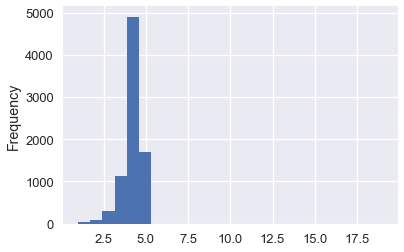

In [20]:
# Plots 'Rating' (which is a value from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25)

Ratings should only be from 0 to 5! There are some ratings that are past the maximum 5 stars, so we will remove those.

In [21]:
# Drops invalid ratings (greater than 5) 
df = df[df.Rating <= 5]

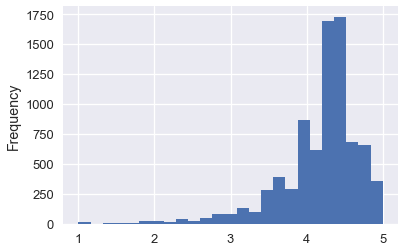

In [22]:
# Plots 'Rating' of apps (which are values from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25)

After removing the invalid values, we are able to get a better idea of the distribution of the ratings ranging from 0 to 5. The graph aboves shows us that there is a greater number of apps that are rated from 2.5-5 than 0-2.5. In other words, there is a negative skew.

In [23]:
# Calculate the mean of 'Rating'
df['Rating'].mean()

4.1725466143277705

From the above histogram, we can say that most apps have high ratings, (with a mean rating of ~4.17) probably due to peoples' rating tendencies. Distribution-wise, __ratings are skewed left__.

#### Word Count

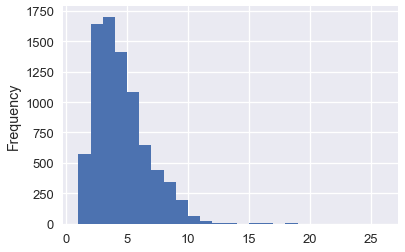

In [24]:
# Plots 'Word Count' of app titles to see its distribution
df['Word Count'].plot.hist(bins = 25)

The plot above has a lot of empty space probably due to the presence of outliers. Let's confirm this.

__ADD OUTLIER CODE AND REMOVE OUTLIERS__

In [25]:
# Calculate the mean of 'Word Count'
df['Word Count'].mean()

4.012757605495584

From the above histogram, we can say that most apps have relatively low word count (with a mean of ~4), so the __word count is skewed right__.

#### Char Count

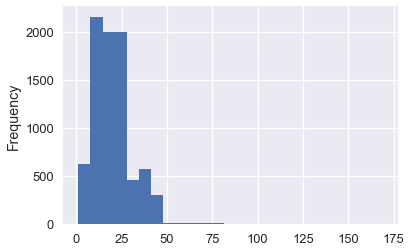

In [26]:
# Plots 'Char Count' app titles to see its distribution
df['Char Count'].plot.hist(bins = 25)

Again, the graph has a lot of empty space that might be because of the presence of outliers. Let's confirm this.

In [27]:
# Calculate the mean of 'Char Count'
df['Char Count'].mean()

20.074828263002946

Char count has a mean of ~20.

From the above histogram, it looks like (talk about distribution in bold). __TODO__

#### Installs

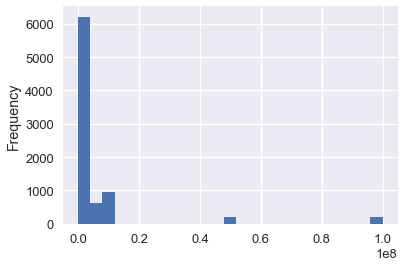

In [28]:
# Plots 'Installs' to see its distribution
df['Installs'].plot.hist(bins = 25)

As we can see above, the graph has many spaces in between the different intervals on the x-axis. This may be due to the fact that our data does not provide a comprehensive number of installs, but instead categegorizes them as above a certain threshold, like 10,000 or 50,000. Therefore, we can see there are many apps in the beginning ranges of 0.0-0.1 1e8. As the range increases to 0.5 1e8 or even 1 1e8, the number of apps in that category begins to decrease.

In [29]:
# Calculate the mean of 'Installs'
df['Installs'].mean()

5289140.74313052

Installs has a mean of ~9,165,089.719.

From the above histogram, it looks like (talk about distribution in bold). __TODO__

### Let's try to explore some relationships between our variables.

In [30]:
# Calculates Pearson correlation coefficient between variables with all observations
df.iloc[:,1:5].corr()

,Rating,Installs,Word Count,Char Count
Rating,1.00,9.65e-02,1.31e-01,0.14
Installs,0.10,1.00e+00,4.67e-03,0.02
Word Count,0.13,4.67e-03,1.00e+00,0.88
Char Count,0.14,2.09e-02,8.80e-01,1.00


Save for the obvious relationship between word count and char count, there is little correlation between the variables based on Pearson's value.

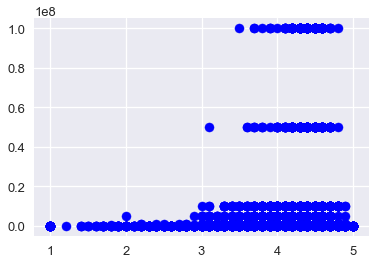

In [31]:
x = df['Rating']
y = df['Installs']
plt.scatter(x, y, c='blue')

With installs on the y axis and ratings on the x axis, we can see that the graph above presents a clear trend. Although not a perfect negative skew, we can see that apps with ratings from 3-5 have a higher number of installs than apps with ratings from 0-2.5. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with ratings 3-5 had that number of installs.

#### We want to see if there is any trend/correlation with word count and installs.

In [32]:
# Groups apps by the number of words they have, then gets the average number of installs and displays them
df_new = df.groupby('Word Count').mean()
df_new

,Rating,Installs,Char Count,a,...,us,ut,ve,vi
Word Count,,,,,,,,,
1,4.10,7.67e+06,7.48,0.39,...,0.02,8.71e-03,0.02,0.01
2,4.08,5.41e+06,10.82,0.52,...,0.02,2.01e-02,0.04,0.02
3,4.13,4.65e+06,16.08,0.68,...,0.03,3.29e-02,0.05,0.03
...,...,...,...,...,...,...,...,...,...
18,4.10,3.00e+05,93.50,1.00,...,0.00,0.00e+00,0.50,0.50
24,4.40,1.00e+06,106.00,1.00,...,0.00,0.00e+00,0.00,0.00
26,4.10,1.00e+06,169.00,1.00,...,1.00,0.00e+00,0.00,1.00


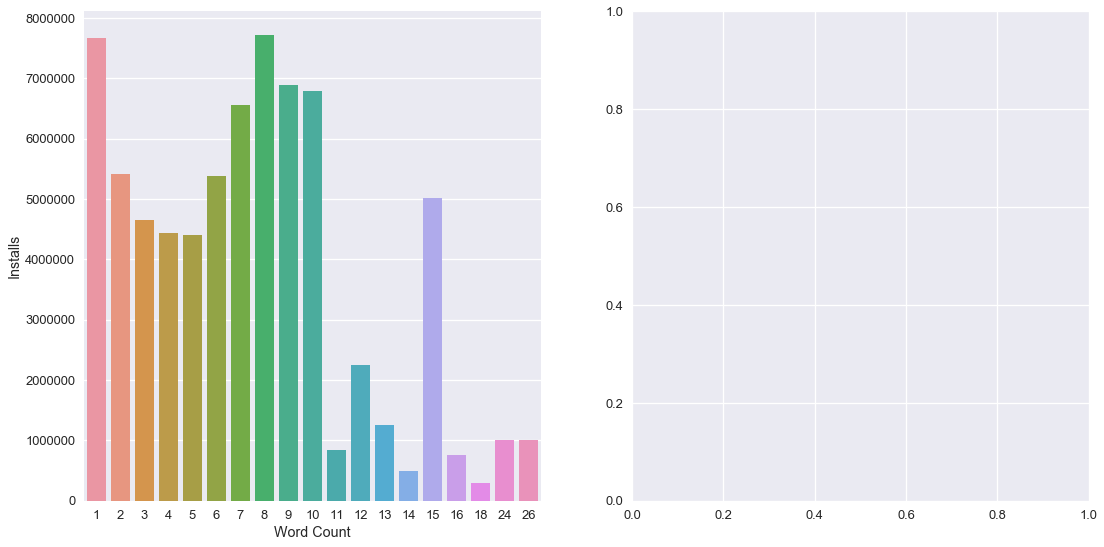

In [33]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1, 2, 1)
# Plots the average number of installs (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

fig.add_subplot(1, 2, 2)



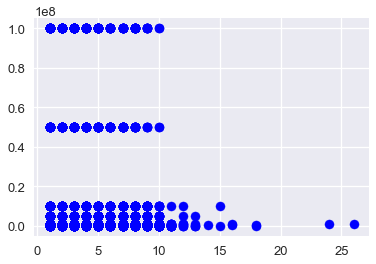

In [34]:
x = df['Word Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

#### Char Count and Installs

In [35]:
# Groups apps by the number of words they have, then gets the average number of installs and displays them
df_new = df.groupby('Char Count').mean()
df_new

,Rating,Installs,Word Count,a,...,us,ut,ve,vi
Char Count,,,,,,,,,
1,3.95,5.25e+05,1.00,0.00,...,0.0,0.0,0.0,0.0
2,3.93,5.78e+06,1.00,0.19,...,0.0,0.0,0.0,0.0
3,3.97,1.66e+07,1.04,0.00,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
96,4.20,1.00e+05,18.00,1.00,...,0.0,0.0,1.0,1.0
106,4.40,1.00e+06,24.00,1.00,...,0.0,0.0,0.0,0.0
169,4.10,1.00e+06,26.00,1.00,...,1.0,0.0,0.0,1.0


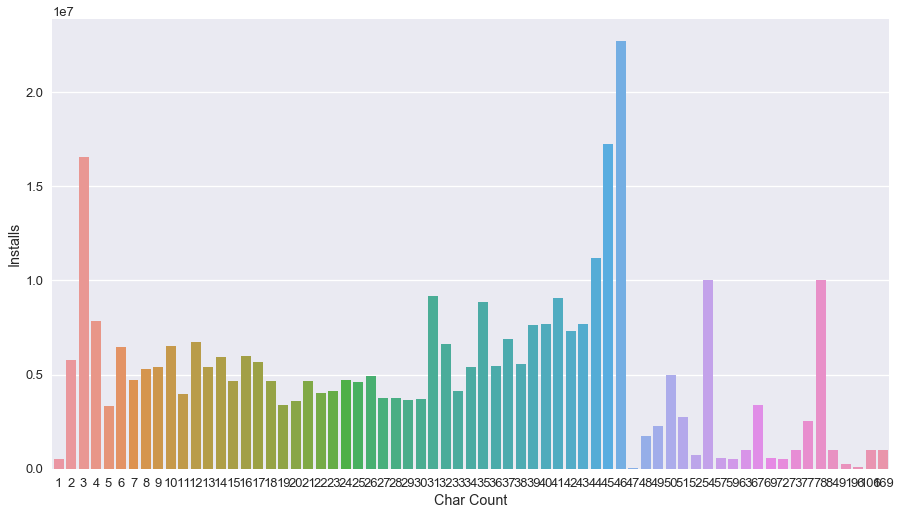

In [41]:
# Plots the average number of installs (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new,
            ax = ax);

__TODO__

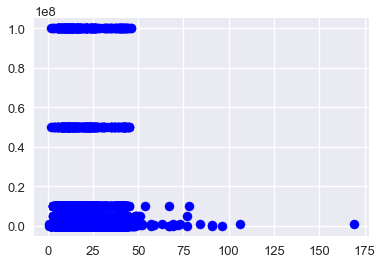

In [37]:
x = df['Char Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

With installs on the y axis and char count on the x axis, we can see that the graph above presents a clear trend. Although not a perfect positive skew, we can see that apps with a char count from 0-50 have a higher number of installs than apps with char counts greater than 50. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with a char count of 0-50 had that number of installs.

Now that we found a trend between word count and installs, is there any relationship between rating and word count?

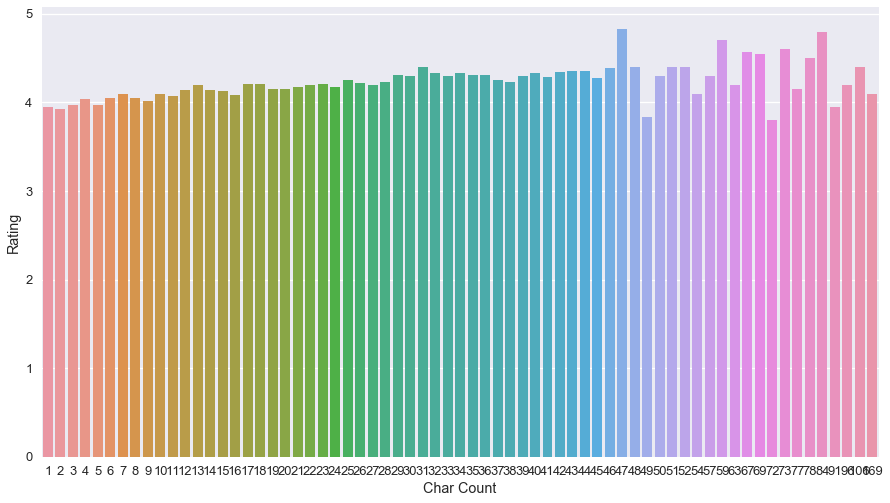

In [42]:
# Plots the average number of installs (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
sns.barplot(x=x1, 
            y='Rating', 
            data=df_new,
            ax = ax);

# Data Analysis & Results

# Ethics & Privacy

# Conclusion & Discussion

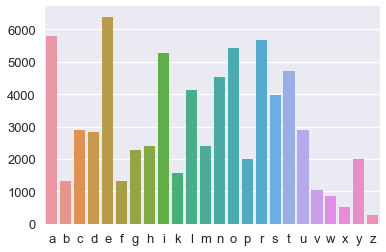

In [39]:
# Make a bar plot where each bar shows the number of app titles each letter appears in

num= []
letter = []
for index in range(5,29):
    pos = (df.iloc[: , index] == 1).sum()
    columnSeriesObj = df.iloc[: , index]
    num.append(pos)
    letter.append(df.iloc[: , index].name)
sns.barplot(letter,num)

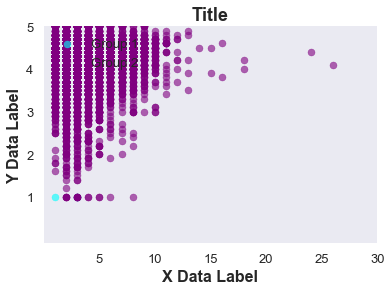

In [40]:
# Create a new figure
fig = plt.figure()
# Add an axes to our figureax = plt.axes()
ax = plt.axes()

x = df['Word Count']
y1 = df['Installs']
y2 = df['Rating']

# Plot the data again
ax.scatter(x, y1, c='cyan', alpha=0.6, label='Group 1', s=50)
plt.plot(linewidth=2)
ax.scatter(x, y2, c='purple', alpha=0.6, label='Group 2', s=50)
# Here we've added some more optional arguments. 
# alpha - sets the transparency of the data points
# label - makes a label for the data we've plotted, which can be used in the legend
# s - size. Changes the size of the dots we plot

# Add a title to our graph
plt.title('Title', fontsize=18, fontweight='bold')

# Add data labels
plt.xlabel('X Data Label', fontsize=16, fontweight='bold')
plt.ylabel('Y Data Label', fontsize=16, fontweight='bold')

# Set the ranges to plot of the x and y variables
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# Set the tick labels
ax.set_xticks(np.array([5,10,15,20,25,30]))
ax.set_yticks(np.array([1,2,3,4,5]))

# hide grid lines
ax.grid(False)

# Turn the top and right side lines off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick marks to only be on the bottom and the left. 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set linewidth of remaining spines
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add a legend. This will use the labels you defined when you set the data.
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
# Legend doesn't require any arguments. 
# Here we optionally specify where to put the legend ('loc'), how many points to use 
#  in the legend ('scatterpoints'), and wether to have a box around the legend ('frameon')